<a href="https://colab.research.google.com/github/abhiram172/umbc_data690_fall2024_1/blob/main/MINI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Assignment 10 - Mini Project
Comparing the economy and wealth of G7 countries and BRICS countries.

Use http://g7brics.streamlit.app as the reference.

Make sure your check your calculation, aggregation, and visualization with the reference site for correctness.

For visualization, pay attention to details - color, label, information display.

##Step 1 - Import Python libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

##Step 2 - Load the input dataset
Download the individaul countries data from the reference site and upload it to your GitHub folder. Load the dataset directly from your GitHub.

In [11]:
# URL of the dataset
url = "https://raw.githubusercontent.com/abhiram172/umbc_data690_fall2024_1/refs/heads/main/Assignment/2024-11-07T00-25_export.csv"

df = pd.read_csv(url)
df.head()



,Unnamed: 0,Year,Country Code,Country Name,Region,Income Group,Lending Type,Military Expenditure ($Millions),Military Expenditure (% of GDP),GDP ($Billions),GDP PPP ($Billions),GDP Per Capita ($),GDP Per Capita PPP ($),Suicide Mortality Rate (Per 100K People),Life Expectancy at Birth (Years),Population (Millions),Group
0,0,2000,ABW,Aruba,Latin America & Caribbean,High income,Not classified,NaN,NaN,1.873453,2.739898,21026.167091,30750.475341,NaN,73.569,0.089101,REST OF WORLD
1,1,2000,AFG,Afghanistan,South Asia,Low income,IDA,NaN,NaN,3.521418,16.377033,180.188369,838.000705,4.9,55.298,19.542982,REST OF WORLD
2,2,2000,AGO,Angola,Sub-Saharan Africa,Lower middle income,IBRD,583.621334,6.392603,9.129595,53.876765,556.884253,3286.358493,8.7,46.024,16.394062,REST OF WORLD
3,3,2000,ALB,Albania,Europe & Central Asia,Upper middle income,IBRD,45.362503,1.246360,3.480355,11.927686,1126.683340,3861.308568,4.9,75.404,3.089027,REST OF WORLD
4,4,2000,AND,Andorra,Europe & Central Asia,High income,Not classified,NaN,NaN,1.432606,2.197696,21674.299722,33249.564905,NaN,NaN,0.066097,REST OF WORLD


## Step 3 - Explore the input dataset
Display number of rows and columns

Dispaly at first 5 rows, last 5 rows, and random 5 rows.

Display information about the dataset

For all numerical variables, display their summary statistics

For all categorical variables, display their number of categories and most frequent category

Find out how many countries each region has.

Display all countries that are Latin American & Caribbean.

Find out how many countries each income level has.

Display all countries that are of high income.

In [12]:
# Display the number of rows and columns
print("Number of rows and columns:")
print(df.shape)

# Display the first 5 rows
print("\nFirst 5 rows:")
print(df.head())

# Display the last 5 rows
print("\nLast 5 rows:")
print(df.tail())

# Display 5 random rows
print("\nRandom 5 rows:")
print(df.sample(5))

# Display information about the dataset
print("\nDataset Information:")
print(df.info())

# For numerical variables, display their summary statistics
print("\nSummary statistics for numerical variables:")
print(df.describe())

# For categorical variables, display their number of categories and most frequent category
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical variable details:")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(f"Number of categories: {df[col].nunique()}")
    print(f"Most frequent category: {df[col].mode()[0]}")

# Find out how many countries each region has
print("\nNumber of countries per region:")
if 'Region' in df.columns:
    print(df['Region'].value_counts())

# Display all countries that are Latin American & Caribbean
print("\nCountries in Latin America & Caribbean:")
if 'Region' in df.columns:
    latam_countries = df[df['Region'] == 'Latin America & Caribbean']
    print(latam_countries['Country Name'])

# Find out how many countries each income level has
print("\nNumber of countries per income level:")
if 'Income Group' in df.columns:
    print(df['Income Group'].value_counts())

# Display all countries that are of high income
print("\nCountries with high income:")
if 'Income Group' in df.columns:
    high_income_countries = df[df['Income Group'] == 'High income']
    print(high_income_countries['Country Name'])


Number of rows and columns:
(5208, 17)

First 5 rows:
   Unnamed: 0  Year Country Code Country Name                      Region  \
0           0  2000          ABW        Aruba  Latin America & Caribbean    
1           1  2000          AFG  Afghanistan                  South Asia   
2           2  2000          AGO       Angola         Sub-Saharan Africa    
3           3  2000          ALB      Albania       Europe & Central Asia   
4           4  2000          AND      Andorra       Europe & Central Asia   

          Income Group    Lending Type  Military Expenditure ($Millions)  \
0          High income  Not classified                               NaN   
1           Low income             IDA                               NaN   
2  Lower middle income            IBRD                        583.621334   
3  Upper middle income            IBRD                         45.362503   
4          High income  Not classified                               NaN   

   Military Expenditure (%

## Step 4 - Categorize Each Country
Create a new column "Group". If a country is one of the seven G7 countried, the value of "Group" would be "G7", if a country of one of the five BRICS countries, the value of "Group" would be "BRICS". Otherwise, the value of "Group" would be "REST of WORLD"

In [13]:
# Define the G7 and BRICS countries
g7_countries = ['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United States']
brics_countries = ['Brazil', 'Russia', 'India', 'China', 'South Africa']

# Create a new column "Group" based on the country categorization
df['Group'] = df['Country Name'].apply(lambda x: 'G7' if x in g7_countries
                                       else 'BRICS' if x in brics_countries
                                       else 'REST of WORLD')

# Display the "Country Name" and "Group" columns as the output
output = df[['Country Name', 'Group']]
print(output)
print(f"\n[Number of rows: {output.shape[0]}, Number of columns: {output.shape[1]}]")



      Country Name          Group
0            Aruba  REST of WORLD
1      Afghanistan  REST of WORLD
2           Angola  REST of WORLD
3          Albania  REST of WORLD
4          Andorra  REST of WORLD
...            ...            ...
5203        Kosovo  REST of WORLD
5204   Yemen, Rep.  REST of WORLD
5205  South Africa          BRICS
5206        Zambia  REST of WORLD
5207      Zimbabwe  REST of WORLD

[5208 rows x 2 columns]

[Number of rows: 5208, Number of columns: 2]


## Step 5 - Aggregate Data
Aggregate the following columns at the "Group" level for each year:

For GDP, using "sum" for aggregation.

For GDP Per Capita, use "mean" for aggregation.

Check your calculation with the reference site.

In [18]:
# Aggregating using the correct column names from the dataset
aggregated_data = df.groupby(['Group', 'Year']).agg(
    Total_GDP=('GDP ($Billions)', 'sum'),
    Avg_GDP_Per_Capita=('GDP Per Capita ($)', 'mean')
).reset_index()

# Display the aggregated results
print(aggregated_data)


            Group  Year     Total_GDP  Avg_GDP_Per_Capita
0           BRICS  2000   2486.928163         2092.467207
1           BRICS  2001   2520.254577         1878.182566
2           BRICS  2002   2624.379626         1787.624629
3           BRICS  2003   3023.233942         2246.204011
4           BRICS  2004   3589.595831         2756.069939
..            ...   ...           ...                 ...
67  REST of WORLD  2019  27739.114846        18357.046155
68  REST of WORLD  2020  26219.456906        16950.972779
69  REST of WORLD  2021  29995.579494        19591.746391
70  REST of WORLD  2022  32131.733042        19694.284580
71  REST of WORLD  2023  33049.763790        16319.230049

[72 rows x 4 columns]


## Step 6 - Calculate Percentage Share of GDP
For each year, calculate the percentage share of each group's GDP. Check your calculation with the reference site.

In [19]:
# Step 1: Calculate the total GDP for each year (sum across all groups)
total_gdp_per_year = aggregated_data.groupby('Year')['Total_GDP'].transform('sum')
aggregated_data['GDP_Percentage_Share'] = (aggregated_data['Total_GDP'] / total_gdp_per_year) * 100
print(aggregated_data[['Group', 'Year', 'Total_GDP', 'GDP_Percentage_Share']])


            Group  Year     Total_GDP  GDP_Percentage_Share
0           BRICS  2000   2486.928163              7.428385
1           BRICS  2001   2520.254577              7.568731
2           BRICS  2002   2624.379626              7.587513
3           BRICS  2003   3023.233942              7.789841
4           BRICS  2004   3589.595831              8.206408
..            ...   ...           ...                   ...
67  REST of WORLD  2019  27739.114846             31.890939
68  REST of WORLD  2020  26219.456906             31.006528
69  REST of WORLD  2021  29995.579494             31.166039
70  REST of WORLD  2022  32131.733042             32.162752
71  REST of WORLD  2023  33049.763790             31.857728

[72 rows x 4 columns]


## Step 7 - Plot the GDP Percentage Share Over Time

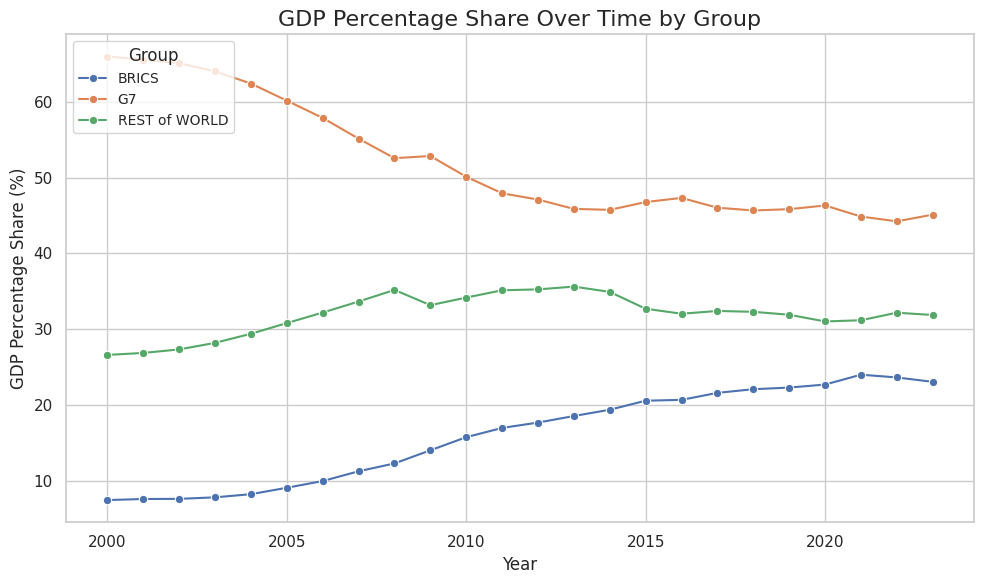

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create the line plot
sns.lineplot(x='Year', y='GDP_Percentage_Share', hue='Group', data=aggregated_data, marker='o')

# Step 2: Customize the plot
plt.title('GDP Percentage Share Over Time by Group', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP Percentage Share (%)', fontsize=12)
plt.legend(title='Group', loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()


## Step 8 - Plot the Total GDP Over Time

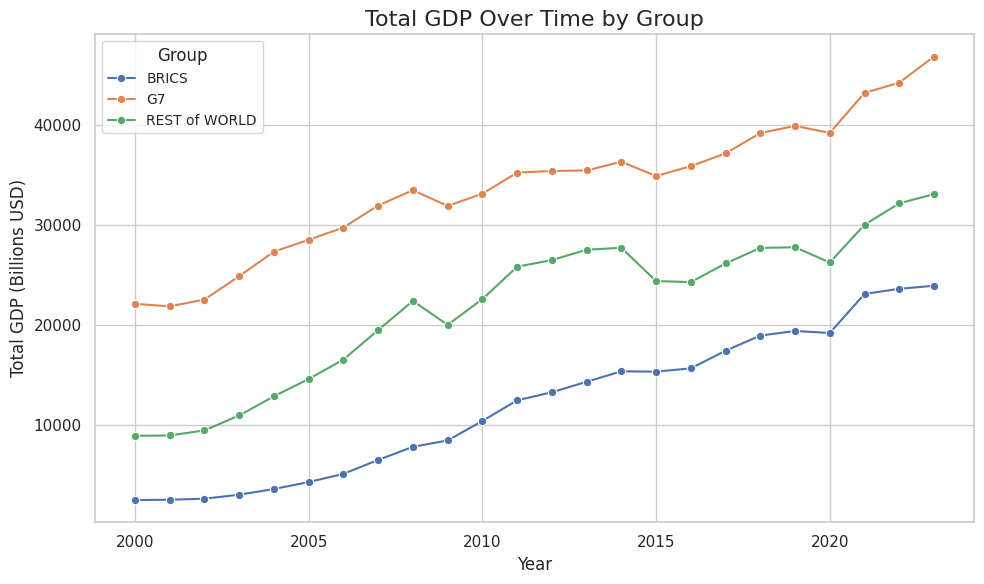

In [22]:
plt.figure(figsize=(10, 6))

# Create the line plot for Total GDP
sns.lineplot(x='Year', y='Total_GDP', hue='Group', data=aggregated_data, marker='o')

# Step 2: Customize the plot
plt.title('Total GDP Over Time by Group', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total GDP (Billions USD)', fontsize=12)
plt.legend(title='Group', loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()


## Step 9 - Plot the 2023 GDP Pie Chart

Each group is a slice of a pie. Make sure the following information is displayed for each slice:

Group Name
GDP Percentage Share
GDP Total

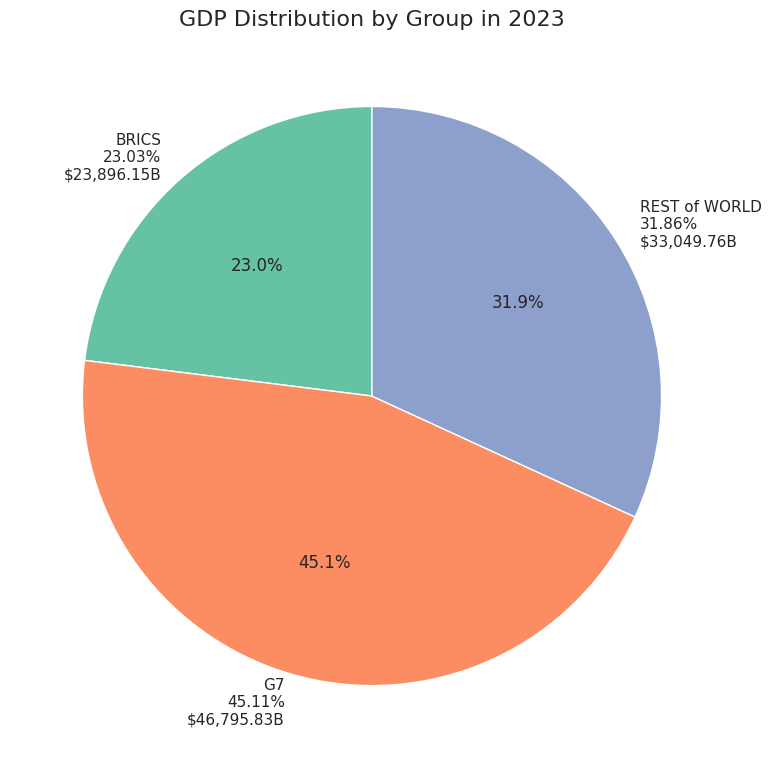

In [25]:

data_2023 = aggregated_data[aggregated_data['Year'] == 2023]

# Step 2: Prepare the data for the pie chart
labels = data_2023['Group']
sizes = data_2023['Total_GDP']
percentage_share = data_2023['GDP_Percentage_Share']
labels_with_info = [f"{label}\n{percent:.2f}%\n${gdp:,.2f}B" for label, percent, gdp in zip(labels, percentage_share, sizes)]

# Step 4: Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels_with_info, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(labels)))
plt.title('GDP Distribution by Group in 2023', fontsize=16)

# Display the pie chart
plt.tight_layout()
plt.show()


## Step 10 - Plot the 2023 GDP Pie Charts

One pie chart for G7 and one pie chart for BRICK. Each country is a slice of a pie. Make sure the following information is displayed for each slice:

Country Name

GDP Percentage Share

GDP Total

Column names in the dataset: Index(['Unnamed: 0', 'Year', 'Country Code', 'Country Name', 'Region',
       'Income Group', 'Lending Type', 'Military Expenditure ($Millions)',
       'Military Expenditure (% of GDP)', 'GDP ($Billions)',
       'GDP PPP ($Billions)', 'GDP Per Capita ($)', 'GDP Per Capita PPP ($)',
       'Suicide Mortality Rate (Per 100K People)',
       'Life Expectancy at Birth (Years)', 'Population (Millions)', 'Group'],
      dtype='object')


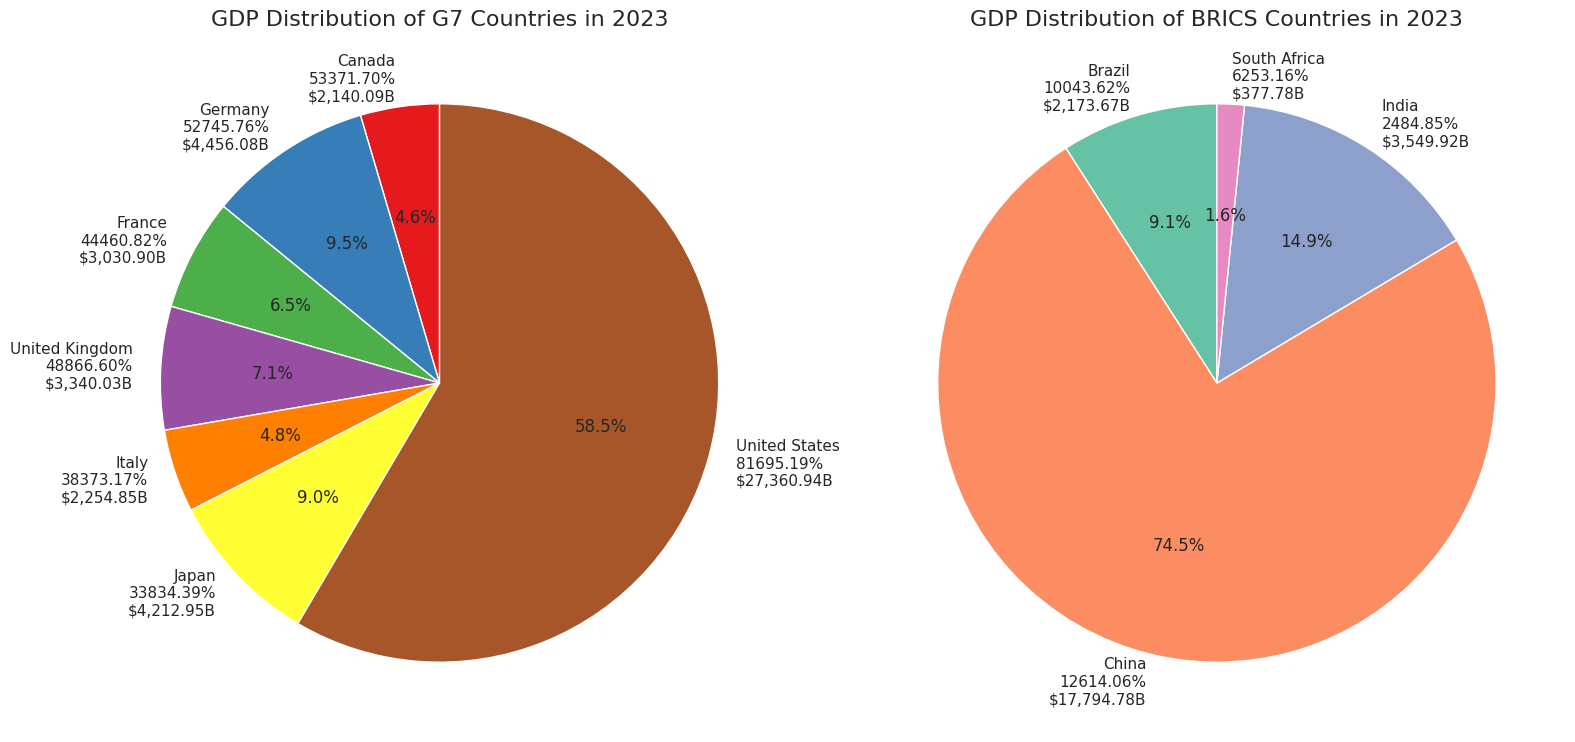

In [30]:
df.columns = df.columns.str.strip()

#Check the column names to ensure 'Country Name' exists
print("Column names in the dataset:", df.columns)

#Add the 'Group' column (G7, BRICS, REST of WORLD)
g7_countries = ['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United States']
brics_countries = ['Brazil', 'Russia', 'India', 'China', 'South Africa']

# Create the 'Group' column
df['Group'] = df['Country Name'].apply(lambda x: 'G7' if x in g7_countries else ('BRICS' if x in brics_countries else 'REST of WORLD'))

#Filter the data for the year 2023 and for G7 and BRICS groups
g7_2023 = df[(df['Year'] == 2023) & (df['Group'] == 'G7')]
brics_2023 = df[(df['Year'] == 2023) & (df['Group'] == 'BRICS')]

#Prepare data for the pie charts for G7 countries
g7_labels = g7_2023['Country Name']
g7_sizes = g7_2023['GDP ($Billions)']
g7_percentage_share = g7_2023['GDP Per Capita ($)']  # Assuming GDP per capita represents the percentage share for simplicity

# Prepare the labels with Country Name, GDP Percentage Share, and GDP Total
g7_labels_with_info = [f"{label}\n{percent:.2f}%\n${gdp:,.2f}B" for label, percent, gdp in zip(g7_labels, g7_percentage_share, g7_sizes)]

#Prepare data for the pie charts for BRICS countries
brics_labels = brics_2023['Country Name']
brics_sizes = brics_2023['GDP ($Billions)']
brics_percentage_share = brics_2023['GDP Per Capita ($)']
brics_labels_with_info = [f"{label}\n{percent:.2f}%\n${gdp:,.2f}B" for label, percent, gdp in zip(brics_labels, brics_percentage_share, brics_sizes)]

#Plot the pie charts for both G7 and BRICS countries
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot for G7 countries
axes[0].pie(g7_sizes, labels=g7_labels_with_info, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set1", len(g7_labels)))
axes[0].set_title('GDP Distribution of G7 Countries in 2023', fontsize=16)

# Plot for BRICS countries
axes[1].pie(brics_sizes, labels=brics_labels_with_info, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(brics_labels)))
axes[1].set_title('GDP Distribution of BRICS Countries in 2023', fontsize=16)
plt.tight_layout()
plt.show()


## Step 11 - Plot the 2023 GDP Sun Burst Chart

Showing the hierarchy of Group and Country.

In [33]:

df.columns = df.columns.str.strip()

# Assign groups
g7_countries = ['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United States']
brics_countries = ['Brazil', 'Russia', 'India', 'China', 'South Africa']
df['Group'] = df['Country Name'].apply(lambda x: 'G7' if x in g7_countries else ('BRICS' if x in brics_countries else 'REST of WORLD'))

# Filter for 2023 data
df_2023 = df[df['Year'] == 2023]

# Prepare data for sunburst chart
sunburst_data = df_2023[['Group', 'Country Name', 'GDP ($Billions)']]

# Plot Sunburst Chart
fig = px.sunburst(sunburst_data, path=['Group', 'Country Name'], values='GDP ($Billions)', title="2023 GDP Distribution")
fig.show()


## Step 12 - Plot the 2023 GDP Tree Map Chart

Showing the hierarchy of Group and Country.

In [34]:

df.columns = df.columns.str.strip()

# Assign groups (G7, BRICS, REST of WORLD)
g7_countries = ['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United States']
brics_countries = ['Brazil', 'Russia', 'India', 'China', 'South Africa']
df['Group'] = df['Country Name'].apply(lambda x: 'G7' if x in g7_countries else ('BRICS' if x in brics_countries else 'REST of WORLD'))

# Filter for 2023 data
df_2023 = df[df['Year'] == 2023]

# Prepare data for Tree Map
tree_map_data = df_2023[['Group', 'Country Name', 'GDP ($Billions)']]

# Plot Tree Map Chart
fig = px.treemap(tree_map_data, path=['Group', 'Country Name'], values='GDP ($Billions)',
                 title="2023 GDP Distribution by Group and Country")
fig.show()


## Step 13 - Plot the Historic Trend of GDP Per Capita

In [35]:

df.columns = df.columns.str.strip()

# Assign groups (G7, BRICS, REST of WORLD)
g7_countries = ['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United States']
brics_countries = ['Brazil', 'Russia', 'India', 'China', 'South Africa']
df['Group'] = df['Country Name'].apply(lambda x: 'G7' if x in g7_countries else ('BRICS' if x in brics_countries else 'REST of WORLD'))

# Prepare data for GDP Per Capita trend
gdp_per_capita_data = df[['Year', 'Group', 'GDP Per Capita ($)']]

# Plot Historic Trend of GDP Per Capita
fig = px.line(gdp_per_capita_data, x='Year', y='GDP Per Capita ($)', color='Group',
              title="Historic Trend of GDP Per Capita (G7, BRICS, and REST of WORLD)",
              labels={'GDP Per Capita ($)': 'GDP Per Capita ($)', 'Year': 'Year'})
fig.show()


## Step 14 - Plot the 2023 GDP Per Capita Bar Chart

Each group is a bar.

In [36]:

df.columns = df.columns.str.strip()

# Assign groups (G7, BRICS, REST of WORLD)
g7_countries = ['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United States']
brics_countries = ['Brazil', 'Russia', 'India', 'China', 'South Africa']
df['Group'] = df['Country Name'].apply(lambda x: 'G7' if x in g7_countries else ('BRICS' if x in brics_countries else 'REST of WORLD'))

# Filter data for the year 2023
df_2023 = df[df['Year'] == 2023]

# Calculate the mean GDP Per Capita for each group in 2023
gdp_per_capita_2023 = df_2023.groupby('Group')['GDP Per Capita ($)'].mean().reset_index()

# Plot 2023 GDP Per Capita Bar Chart
fig = px.bar(gdp_per_capita_2023, x='Group', y='GDP Per Capita ($)',
             title="2023 GDP Per Capita by Group",
             labels={'GDP Per Capita ($)': 'GDP Per Capita ($)', 'Group': 'Group'})
fig.show()


## Step 15 - Plot the 2023 GDP Per Capita Bar Chart of G7 and BRICS countries

Each country is a bar. Differentiate group by color.

In [37]:

df.columns = df.columns.str.strip()

# Assign groups (G7, BRICS, REST of WORLD)
g7_countries = ['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United States']
brics_countries = ['Brazil', 'Russia', 'India', 'China', 'South Africa']
df['Group'] = df['Country Name'].apply(lambda x: 'G7' if x in g7_countries else ('BRICS' if x in brics_countries else 'REST of WORLD'))

# Filter data for 2023 and only G7 and BRICS countries
df_2023_g7_brics = df[(df['Year'] == 2023) & (df['Group'].isin(['G7', 'BRICS']))]

# Plot the 2023 GDP Per Capita Bar Chart for G7 and BRICS
fig = px.bar(df_2023_g7_brics, x='Country Name', y='GDP Per Capita ($)', color='Group',
             title="2023 GDP Per Capita by Country (G7 and BRICS)",
             labels={'GDP Per Capita ($)': 'GDP Per Capita ($)', 'Country Name': 'Country'},
             color_discrete_map={"G7": "blue", "BRICS": "red"})  # Custom colors for G7 and BRICS
fig.update_layout(xaxis_tickangle=45)  # Rotate country names for better readability
fig.show()


## Step 16 - Create a Choropleth

To show G7 countries and BRICS countries and use color code to differentiate the two broups.

In [38]:


df.columns = df.columns.str.strip()

# Assign groups (G7, BRICS, REST of WORLD)
g7_countries = ['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United States']
brics_countries = ['Brazil', 'Russia', 'India', 'China', 'South Africa']
df['Group'] = df['Country Name'].apply(lambda x: 'G7' if x in g7_countries else ('BRICS' if x in brics_countries else 'REST of WORLD'))

# Prepare the data for the Choropleth map
choropleth_data = df[df['Group'].isin(['G7', 'BRICS'])]  # Filter only G7 and BRICS countries
choropleth_data = choropleth_data[['Country Name', 'Group']]  # Select relevant columns

# Create a choropleth map
fig = px.choropleth(choropleth_data, locations='Country Name',
                    color='Group',
                    color_discrete_map={'G7': 'blue', 'BRICS': 'red'},
                    title='G7 and BRICS Countries (2023)',
                    labels={'Group': 'Group'},
                    locationmode='country names')

fig.update_geos(showcoastlines=True, coastlinecolor="Black", projection_type="natural earth")
fig.show()
